# Trova i migliori film di fantascienza con Pandas

> [Video spiegazione metodologia](https://www.youtube.com/watch?v=eFavjhKcCTg&list=PLa-sizbCyh92Urd3iugqe5ji_qKux3h6Y&index=5)    

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [4]:
basics = pd.read_csv("./title.basics.tsv.gz", sep="\t" )

/tmp/ipykernel_16699/1819926725.py:1: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  basics = pd.read_csv("./title.basics.tsv.gz", sep="\t" )


In [5]:
basics.sample(3)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
6476197,tt4350558,tvEpisode,Episode #1.47,Episode #1.47,0,\N,\N,\N,Drama
3731397,tt15034876,tvEpisode,Sandy Summer and Georgia South,Sandy Summer and Georgia South,1,2006,\N,9,Adult
2845702,tt13415612,tvEpisode,Dmitry Medvedev,Dmitry Medvedev,0,2012,\N,\N,Talk-Show


In [6]:
len(basics) # quanti elementi ci sono nel nostro DataFrame?

8994706

In [7]:
movie_filter = basics['titleType'] == 'movie'
basics_movies = basics[movie_filter]
len(basics_movies) # quanti film nel DataFrame?


612600

In [8]:
ratings = pd.read_csv("./title.ratings.tsv.gz", sep="\t")

In [9]:
ratings.sample(3)

,tconst,averageRating,numVotes
1185330,tt8030868,5.20,9
822349,tt2142693,9.60,17
403388,tt0828598,6.20,155


## Statistiche Descrittive

In [10]:
ratings.describe()

,averageRating,numVotes
count,1253550.00,1253550.00
mean,6.92,998.39
std,1.39,16776.33
min,1.00,5.00
25%,6.20,11.00
50%,7.10,24.00
75%,7.90,94.00
max,10.00,2597650.00


<AxesSubplot:>

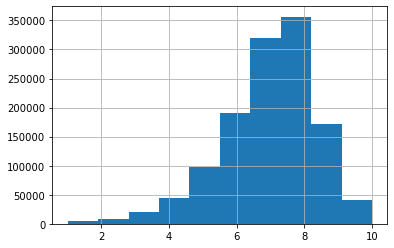

In [11]:
ratings['averageRating'].hist()

(0.0, 100000.0)

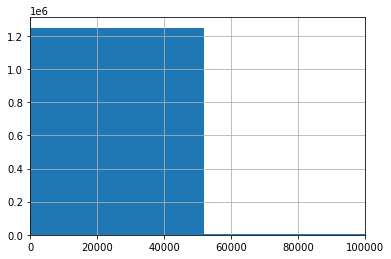

In [12]:
p = ratings['numVotes'].hist(bins=50)
p.set_xlim(0, 100000)

(0.0, 50000.0)

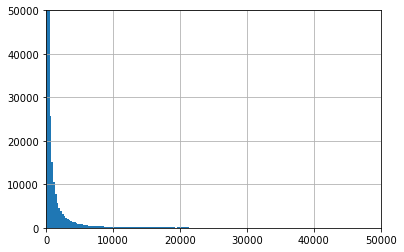

In [13]:
p = ratings['numVotes'].hist(bins=10000)
p.set_xlim(0, 50000)
p.set_ylim(0, 50000)

## LOG Scaling

In [14]:
ratings['logNumVotes'] = np.log(ratings['numVotes'])
ratings

,tconst,averageRating,numVotes,logNumVotes
0,tt0000001,5.70,1888,7.54
1,tt0000002,5.90,250,5.52
2,tt0000003,6.50,1677,7.42
3,tt0000004,5.80,163,5.09
4,tt0000005,6.20,2498,7.82
...,...,...,...,...
1253545,tt9916690,6.50,6,1.79
1253546,tt9916720,5.30,223,5.41
1253547,tt9916730,8.40,6,1.79
1253548,tt9916766,6.70,20,3.00


<AxesSubplot:>

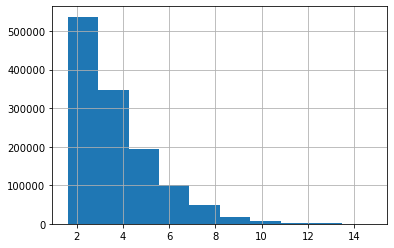

In [15]:
ratings['logNumVotes'].hist()
# abbiamo ridotto impatto di valori estremi nella distribuzione

## Mettiamo il voto ed il numero di voti in uno stesso RANGE

In [16]:
ratings.max()

tconst           tt9916778
averageRating        10.00
numVotes           2597650
logNumVotes          14.77
dtype: object

In [17]:
ratings['averageRating'] /= ratings['averageRating'].max()
ratings['logNumVotes'] /= ratings['logNumVotes'].max()

In [18]:
ratings.describe()

,averageRating,numVotes,logNumVotes
count,1253550.00,1253550.00,1253550.00
mean,0.69,998.39,0.25
std,0.14,16776.33,0.12
min,0.10,5.00,0.11
25%,0.62,11.00,0.16
50%,0.71,24.00,0.22
75%,0.79,94.00,0.31
max,1.00,2597650.00,1.00


In [19]:
ratings['PolloRating'] = ratings['averageRating'] * ratings['logNumVotes']

In [20]:
ratings # pollo rating esprime sia la popolarità ed il voto assegnato

,tconst,averageRating,numVotes,logNumVotes,PolloRating
0,tt0000001,0.57,1888,0.51,0.29
1,tt0000002,0.59,250,0.37,0.22
2,tt0000003,0.65,1677,0.50,0.33
3,tt0000004,0.58,163,0.34,0.20
4,tt0000005,0.62,2498,0.53,0.33
...,...,...,...,...,...
1253545,tt9916690,0.65,6,0.12,0.08
1253546,tt9916720,0.53,223,0.37,0.19
1253547,tt9916730,0.84,6,0.12,0.10
1253548,tt9916766,0.67,20,0.20,0.14


<AxesSubplot:>

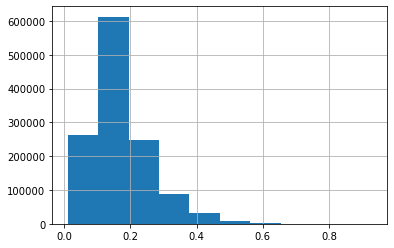

In [21]:
ratings['PolloRating'].hist()

## Join tra i 2 dataframe: MERGE - JOIN

In [22]:
rated_movies = basics_movies.merge(ratings, on='tconst')
rated_movies

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,logNumVotes,PolloRating
0,tt0000502,movie,Bohemios,Bohemios,0,1905,\N,100,\N,0.45,14,0.18,0.08
1,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Action,Adventure,Biography",0.60,772,0.45,0.27
2,tt0000591,movie,The Prodigal Son,L'enfant prodigue,0,1907,\N,90,Drama,0.45,18,0.20,0.09
3,tt0000615,movie,Robbery Under Arms,Robbery Under Arms,0,1907,\N,\N,Drama,0.45,23,0.21,0.10
4,tt0000630,movie,Hamlet,Amleto,0,1908,\N,\N,Drama,0.39,25,0.22,0.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
279372,tt9916270,movie,Il talento del calabrone,Il talento del calabrone,0,2020,\N,84,Thriller,0.58,1340,0.49,0.28
279373,tt9916362,movie,Coven,Akelarre,0,2020,\N,92,"Drama,History",0.64,4703,0.57,0.37
279374,tt9916428,movie,The Secret of China,Hong xing zhao yao Zhong guo,0,2019,\N,\N,"Adventure,History,War",0.38,14,0.18,0.07
279375,tt9916538,movie,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,0,2019,\N,123,Drama,0.83,6,0.12,0.10


In [23]:
scifi_filter = rated_movies['genres'].str.contains('Sci-Fi')
scifi_movies = rated_movies[scifi_filter]

In [24]:
scifi_filter.value_counts()

False    272746
True       6631
Name: genres, dtype: int64

In [25]:
scifi_movies.sample(5)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,logNumVotes,PolloRating
53643,tt0097228,movie,Dr. Caligari,Dr. Caligari,0,1989,\N,80,"Comedy,Horror,Sci-Fi",0.60,1146,0.48,0.29
273601,tt8808166,movie,The Cage,The Cage,0,2018,\N,83,"Drama,Fantasy,Sci-Fi",0.72,6,0.12,0.09
91614,tt0214468,movie,Space Armageddon,Amagedon,0,1996,\N,86,"Animation,Fantasy,Sci-Fi",0.44,108,0.32,0.14
53892,tt0097630,movie,Journey to the Center of the Earth,Journey to the Center of the Earth,0,1988,\N,100,"Adventure,Sci-Fi",0.26,1243,0.48,0.13
155817,tt1125254,movie,Dragon Ball Z: Cooler's Revenge,Dragon Ball Z: Tobikkiri no Saikyô tai Saikyô,0,1991,\N,47,"Action,Animation,Sci-Fi",0.71,7185,0.60,0.43


In [26]:
columns_of_interest = [ 
    "titleType",
   	"primaryTitle",
   	"startYear",
   	"runtimeMinutes",
    "genres",	
    "PolloRating",
]

In [27]:
scifi_final = scifi_movies[columns_of_interest]
scifi_final.sort_values(by='PolloRating', ascending=False, inplace=True)

/tmp/ipykernel_16699/2295393136.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scifi_final.sort_values(by='PolloRating', ascending=False, inplace=True)


In [30]:
scifi_final.head(10)

,titleType,primaryTitle,startYear,runtimeMinutes,genres,PolloRating
172784,movie,Inception,2010,148,"Action,Adventure,Sci-Fi",0.87
69803,movie,The Matrix,1999,136,"Action,Sci-Fi",0.85
141241,movie,Interstellar,2014,169,"Adventure,Drama,Sci-Fi",0.84
137194,movie,The Prestige,2006,130,"Drama,Mystery,Sci-Fi",0.81
56940,movie,Terminator 2: Judgment Day,1991,137,"Action,Sci-Fi",0.81
48682,movie,Back to the Future,1985,116,"Adventure,Comedy,Sci-Fi",0.80
233735,movie,Avengers: Infinity War,2018,149,"Action,Adventure,Sci-Fi",0.79
42666,movie,Alien,1979,117,"Horror,Sci-Fi",0.79
117391,movie,Eternal Sunshine of the Spotless Mind,2004,108,"Drama,Romance,Sci-Fi",0.78
131445,movie,V for Vendetta,2005,132,"Action,Drama,Sci-Fi",0.77


In [33]:
scifi_final.tail(5)

,titleType,primaryTitle,startYear,runtimeMinutes,genres,PolloRating
177417,movie,Invasion of the Empire of the Apes,2021,74,"Action,Fantasy,Sci-Fi",0.03
252251,movie,Alien brainsuckers,2006,67,"Comedy,Horror,Sci-Fi",0.03
253268,movie,Mastera poroka,2010,112,"Drama,Sci-Fi",0.03
187642,movie,The Revenge of Plant,2018,\N,"Fantasy,Romance,Sci-Fi",0.03
199561,movie,Timeserver,2004,113,"Drama,Romance,Sci-Fi",0.03


In [29]:
scifi_final.to_csv('scifiFinal.csv')